# Cairo Periodic Boundaries

    In this script, I will compute a Cairo lattice simulation but with periodic boundaries in order to observe if the evolution of charges is preserved with those. 

In [1]:
import os
import sys
import numpy as np
from importlib import reload  
import support as sup
reload(sup)
sys.path.insert(0, '../icenumerics')

import icenumerics as ice

from icenumerics.geometry import ordering 
import magcolloids as mgc

import matplotlib.pyplot as plt
ureg = ice.ureg
from string import Template

%load_ext autoreload
%autoreload 2

In [2]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-8.0"

    To set correctly periodic boundaries I need to build a Cairo lattice but with a square structure. This way there will be a match of the vertices by only translating the lattice a certain quantity. To do that I need to re-draw the lattice. Let's start! 

In [3]:
np.random.seed()

l = 3
a = 19.5458*ureg.um
sp = sup.spins()
ureg = ice.ureg
sp.create_lattice(geometry = "cairo",size =[l,l],lattice_constant=19.5458*ureg.um, border="periodic")
sp.order_spins(ordering.random_ordering)

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:283: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new_centers[:,1] = centersY


In [4]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap_long = ice.trap(trap_sep = 10*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

trap_short = ice.trap(trap_sep = 4.5258*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

traps = []

In [5]:
for s in sp:
    
    if ( s.direction[0].magnitude == a.magnitude or s.direction[0].magnitude == -a.magnitude or 
        s.direction[1].magnitude == a.magnitude or s.direction[1].magnitude == -a.magnitude ):
        
        traps.append(trap_short)
        
    else:
        
        traps.append(trap_long)

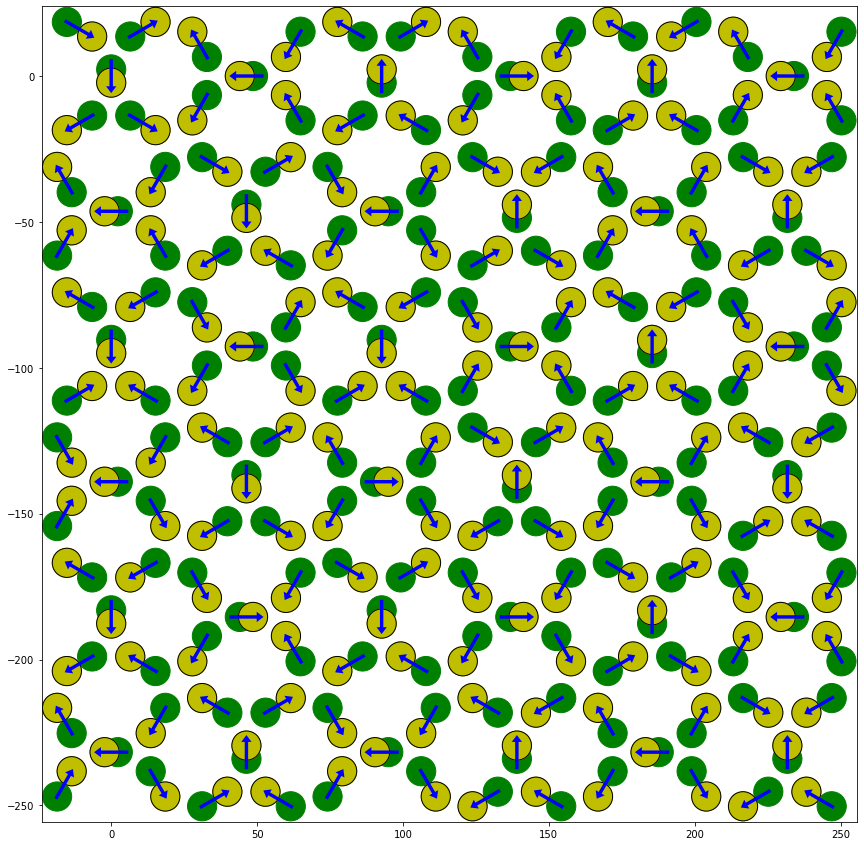

In [6]:
col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)

col.pad_region(7.1539*ureg.um) # Parameter obtained by geometric restrictions.

f, (ax1) = plt.subplots(1,1,figsize = (15,15))
col.display(ax1)
sp.display(ax1)

In [7]:
# < Periodic boundaries >

#world = ice.world(
#    field = 25*ureg.mT,
#    temperature = 300*ureg.K,
#    dipole_cutoff = 200*ureg.um,
#   boundaries = ["p", "p", "p"])

# < Free boundaries >

world = ice.world(
    field = 25*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

In [8]:
total_time = 600*ureg.s
col.simulate(world,
             name = "ACI_CairoLattice_l%u_15mT-800s"%(l),
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = total_time,
             output = ["x","y","z","mux","muy","muz"])

scanning file


In [9]:
col.sim.field.fieldz = "v_Bmag*time/%f"%(total_time.to(ureg.us).magnitude)
col.run_simulation()

In [10]:
col.load_simulation(slice(0,None,1))

scanning file


In [11]:
for c in col:
    print(c.center)
    print(c.direction)

[0.0 0.0 0.0] micrometer
[-0. -1. -0.]
[10.865524559326222 16.046113529213482 0.0] micrometer
[-0.8660254 -0.5       -0.       ]
[-10.865524559326222 16.046113529213482 0.0] micrometer
[-0.8660254  0.5        0.       ]
[10.865524559326222 -16.046113529213482 0.0] micrometer
[-0.8660254  0.5       -0.       ]
[-10.865524559326222 -16.046113529213482 0.0] micrometer
[-0.8660254 -0.5        0.       ]
[46.35198129208714 0.0 0.0] micrometer
[-1. -0. -0.]
[30.305867762873657 10.865524559326222 0.0] micrometer
[-0.5        0.8660254  0.       ]
[30.305867762873657 -10.865524559326222 0.0] micrometer
[-0.5       -0.8660254 -0.       ]
[62.398094821300624 10.865524559326222 0.0] micrometer
[0.5       0.8660254 0.       ]
[62.398094821300624 -10.865524559326222 0.0] micrometer
[-0.5        0.8660254  0.       ]
[0.0 -46.35198129208714 0.0] micrometer
[-1. -0. -0.]
[16.046113529213482 -35.48645673276092 0.0] micrometer
[-0.5       -0.8660254 -0.       ]
[-16.046113529213486 -35.48645673276092 0

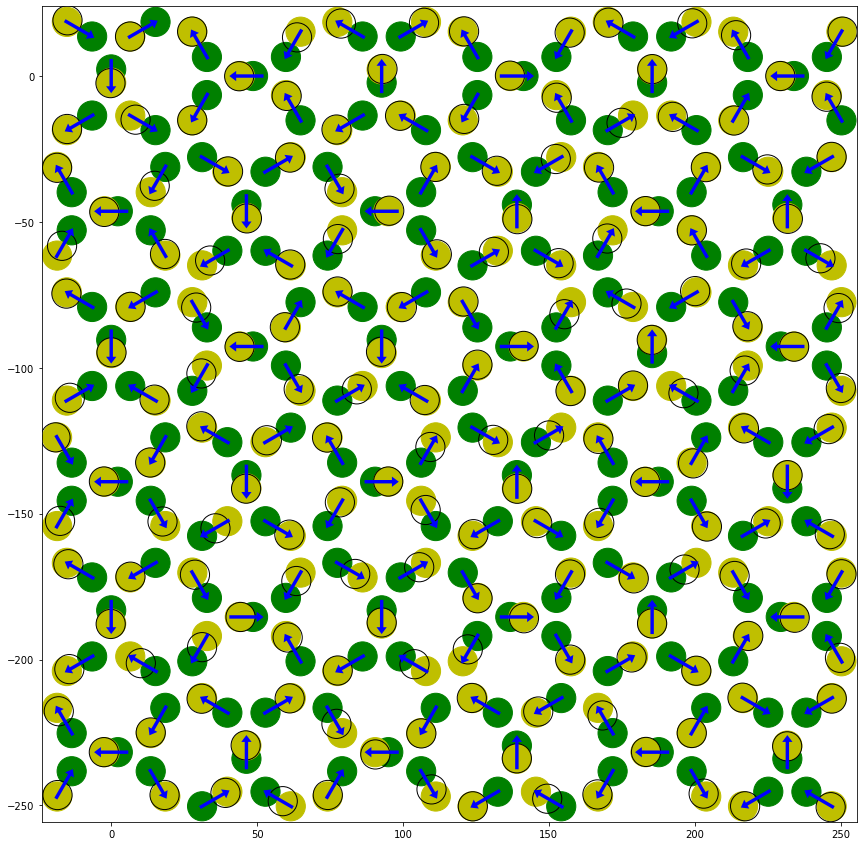

In [12]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
col.display(ax1)
sp.display(ax1)

In [13]:
from matplotlib import patches

In [17]:
#f, (ax1) = plt.subplots(1,1,figsize = (15,15))
#for c in col:
#

        
#    X=c.center[0].magnitude
#    Y=c.center[1].magnitude
#    DX=c.direction[0]
#    DY=c.direction[1]
#    W = np.sqrt(DX**2+DY**2)
#    c.width = W
#    ax1.plot([X],[Y],'blue')
    #ax1.plot([X-DX,X+DX],[Y-DY,Y+DY],'-+')
#    ax1.add_patch(patches.Arrow(X-DX,Y-DY,DX,DY,width=W*100,fc='blue'))
#plt.axis('off')
#plt.savefig('lattice.png', dpi=1200)

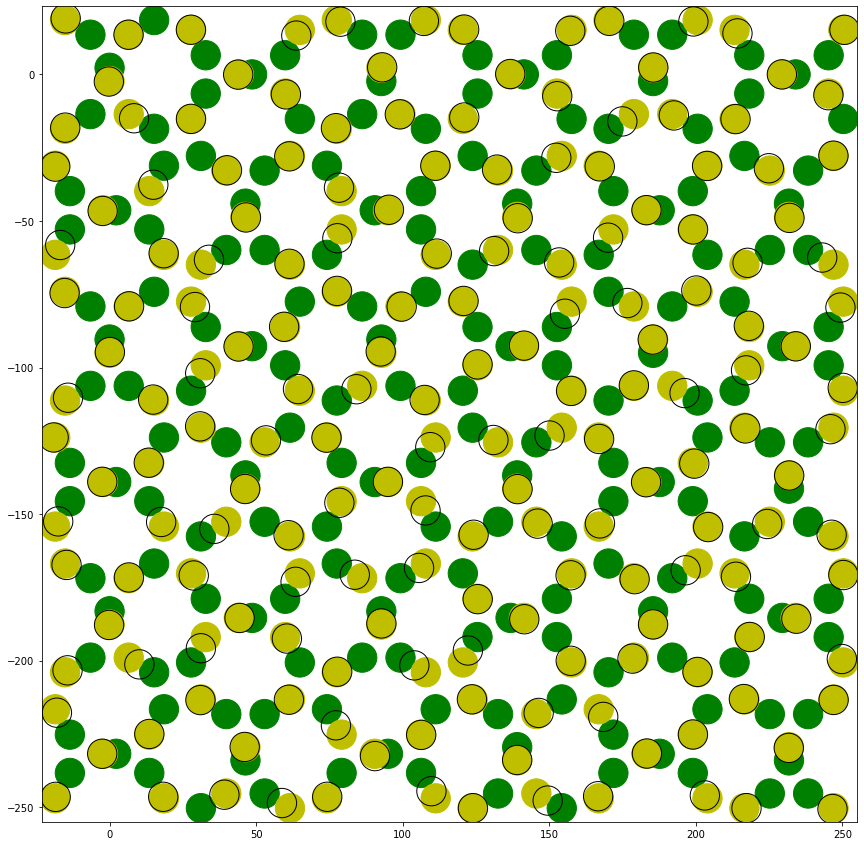

In [15]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
col.set_state_from_frame(-1)
col.display(ax1)
#sp.display(ax1)

,x,y,coordination,dx,dy
charge,,,,,
-3,1,1,1,1,1
-2,3,3,3,3,3
-1,53,53,53,53,53
0,22,22,22,22,22
1,18,18,18,18,18
2,20,20,20,20,20


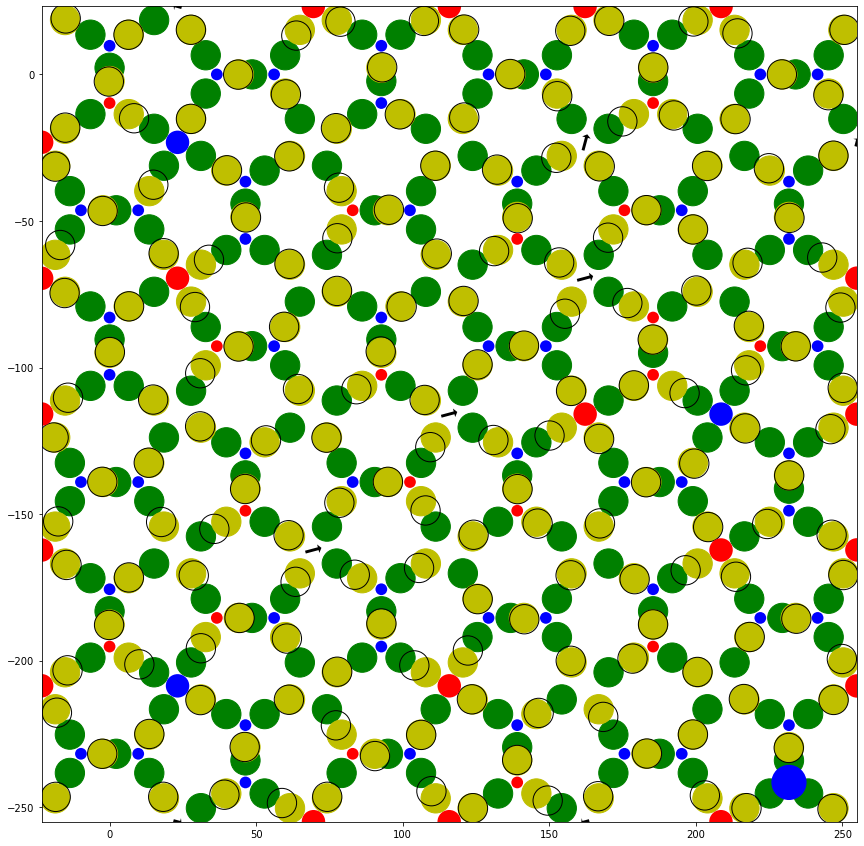

In [16]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(-1)
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)
v.vertices.groupby('charge').count()

    It works!!!